In [1]:
import os
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
os.chdir(r'C:\Users\user\Desktop\새 폴더')

In [7]:
dataset = 'logvp'

In [8]:
# MSE
df_train_MSE = pd.read_csv('result_train.csv')
print(df_train_MSE.shape[1])

23


In [9]:
# MSE 컬럼명 추가
columns = ['target', 'fitted'] + [f'feature{i}' for i in range(1, df_train_MSE.shape[1]-1)]
df_train_MSE.columns = columns

In [10]:
# R^2
r2_mse = r2_score(df_train_MSE['target'], df_train_MSE['fitted'])

print('r2_mse:', r2_mse)

# adjusted R^2
adjusted_r2_mse = ((len(df_train_MSE) - 1) * r2_mse - df_train_MSE.shape[1]) / (len(df_train_MSE) - df_train_MSE.shape[1] - 1)

print('adjusted r2_mse:', adjusted_r2_mse)


r2_mse: 0.9789662054223055
adjusted r2_mse: 0.9787717611798268


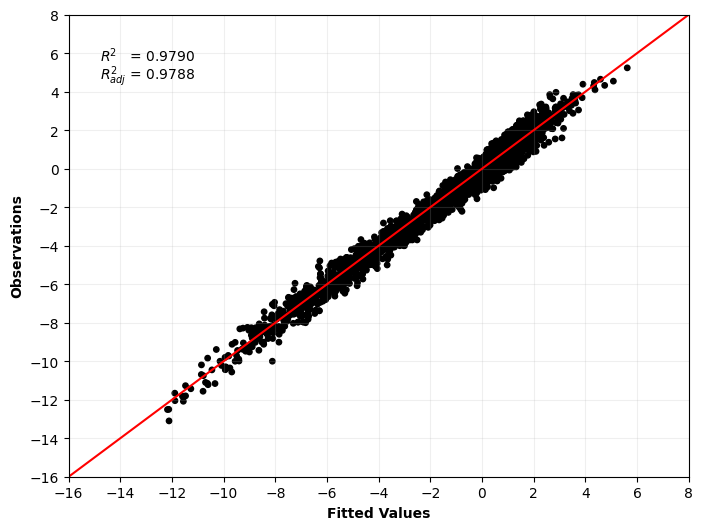

In [11]:
if dataset in ['freesolv', 'esol', 'lipo', 'logvp']:
    s = 15
elif dataset in ['vd', 'logp', 'logvp_old']:
    s = 25

from matplotlib.colors import ListedColormap
pastel_cmap = ListedColormap(["black"])

plt.figure(figsize = (8, 6))

scatter = plt.scatter(df_train_MSE['fitted'], df_train_MSE['target'],
                      c=df_train_MSE['target'], s = s,
                      cmap = pastel_cmap)

# 대각선 추가
min_val = min(df_train_MSE['target'].min(), df_train_MSE['fitted'].min()) - 20
max_val = max(df_train_MSE['target'].max(), df_train_MSE['fitted'].max()) + 20
plt.plot([min_val, max_val], [min_val, max_val], color='red')

if dataset == 'freesolv':
    plt.xlim(-15, 6)
    plt.ylim(-15, 6)
    plt.xticks(range(-15, 9, 3))
    plt.yticks(range(-15, 9, 3))
elif dataset == 'esol':
    plt.xlim(-12, 4)
    plt.ylim(-12, 4)
    plt.xticks(range(-12, 5, 2))
    plt.yticks(range(-12, 5, 2))
elif dataset == 'lipo':
    plt.xlim(-4, 8)
    plt.ylim(-4, 8)
    plt.xticks(range(-4, 10, 2))
    plt.yticks(range(-4, 10, 2))
elif dataset == 'logp':
    plt.xlim(-8, 10)
    plt.ylim(-8, 10)
    plt.xticks(range(-8, 12, 2))
    plt.yticks(range(-8, 12, 2))
elif dataset == 'logvp_old':
    plt.xlim(-20, 15)
    plt.ylim(-20, 15)
    plt.xticks(range(-20, 16, 5))
    plt.yticks(range(-20, 16, 5))
elif dataset == 'logvp':
    plt.xlim(-16, 8)
    plt.ylim(-16, 8)
    plt.xticks(range(-16, 9, 2))
    plt.yticks(range(-16, 9, 2))
# elif dataset == 'vd':
#     plt.xlim(0, 8)
#     plt.ylim(0, 8)
#     plt.xticks(range(0, 9, 1))
#     plt.yticks(range(0, 9, 1))

plt.xlabel("Fitted Values", fontweight = 'bold')
plt.ylabel("Observations", fontweight = 'bold')

plt.text(0.05, 0.90, rf'$R{{^2}}$   = {r2_mse:.4f}',
         transform = plt.gca().transAxes,
         fontsize = 10,)
plt.text(0.05, 0.86, rf'$R_{{adj}}^2$ = {adjusted_r2_mse:.4f}',
         transform = plt.gca().transAxes,
         fontsize = 10,)

plt.grid(alpha = 0.2)

# # 저장
# file_name = f'scatter_fitted_mse_{dataset}.png'
# file_path = os.path.join(save_dir, file_name)
# print(file_path)
# plt.savefig(file_path, dpi = 300, bbox_inches = 'tight')

plt.show()

# MSE & MAE for Test dataset

In [12]:
# MSE
df_test_MSE = pd.read_csv('result_test.csv')
print(df_test_MSE.shape[1])


23


In [13]:
# MSE 컬럼명 추가
columns = ['target', 'pred'] + [f'feature{i}' for i in range(1, df_test_MSE.shape[1]-1)]
df_test_MSE.columns = columns

In [14]:
# R^2
r2_mse = r2_score(df_test_MSE['target'], df_test_MSE['pred'])
print('r2_mse:', r2_mse)

# adjusted R^2
adjusted_r2_mse = ((len(df_test_MSE) - 1) * r2_mse - df_test_MSE.shape[1]) / (len(df_test_MSE) - df_test_MSE.shape[1] - 1)
print('adjusted r2_mse:', adjusted_r2_mse)

r2_mse: 0.9490406614579636
adjusted r2_mse: 0.947100156844608


# MSE

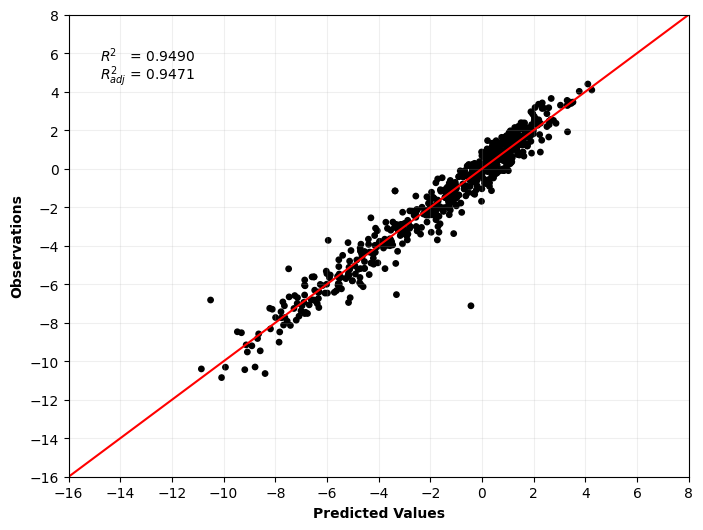

: 

In [ ]:
if dataset in ['freesolv', 'esol', 'lipo', 'logvp']:
    s = 15
elif dataset in ['vd', 'logp', 'logvp_old']:
    s = 25

from matplotlib.colors import ListedColormap
pastel_cmap = ListedColormap(["black"])

plt.figure(figsize = (8, 6))

scatter = plt.scatter(df_test_MSE['pred'], df_test_MSE['target'],
                      c=df_test_MSE['target'], s = s,
                      cmap = pastel_cmap)

# 대각선 추가
min_val = min(df_test_MSE['target'].min(), df_test_MSE['pred'].min()) - 20
max_val = max(df_test_MSE['target'].max(), df_test_MSE['pred'].max()) + 20
plt.plot([min_val, max_val], [min_val, max_val], color='red')

if dataset == 'freesolv':
    plt.xlim(-15, 6)
    plt.ylim(-15, 6)
    plt.xticks(range(-15, 9, 3))
    plt.yticks(range(-15, 9, 3))
elif dataset == 'logvp':
    plt.xlim(-16, 8)
    plt.ylim(-16, 8)
    plt.xticks(range(-16, 9, 2))
    plt.yticks(range(-16, 9, 2))


plt.xlabel("Predicted Values", fontweight = 'bold')
plt.ylabel("Observations", fontweight = 'bold')

plt.text(0.05, 0.90, rf'$R{{^2}}$   = {r2_mse:.4f}',
         transform = plt.gca().transAxes,
         fontsize = 10,)
plt.text(0.05, 0.86, rf'$R_{{adj}}^2$ = {adjusted_r2_mse:.4f}',
         transform = plt.gca().transAxes,
         fontsize = 10,)


plt.grid(alpha = 0.2)

# # 저장
# file_name = f'scatter_pred_mse_{dataset}.png'
# file_path = os.path.join(save_dir, file_name)
# print(file_path)
# plt.savefig(file_path, dpi = 300, bbox_inches = 'tight')

plt.show()